## Импортируем и анализируем данные

In [1]:
import pandas as pd
from scipy.stats import mode
agg_func_stats = {'order_purchase_weekday': [pd.Series.mode]}
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from operator import attrgetter

### Датасет с данными о покупателях

In [2]:
data_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-androsova/first_project/PROJECT_ecommerce/olist_customers_dataset.csv')
data_customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [3]:
data_customers.shape

(99441, 5)

In [4]:
data_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Датасет с данными о заказах

In [5]:
data_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-androsova/first_project/PROJECT_ecommerce/olist_orders_dataset.csv')
data_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [6]:
data_orders.shape

(99441, 8)

In [7]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Датасет с данными о товарах в заказе

In [8]:
data_orders_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-androsova/first_project/PROJECT_ecommerce/olist_order_items_dataset.csv')
data_orders_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [9]:
data_orders_items.shape

(112650, 7)

In [10]:
data_orders_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Объединяем все 3 датасета в один

In [11]:
data = data_customers.merge(data_orders, on = 'customer_id').merge(data_orders_items, on = 'order_id')
data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,1,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20 00:00:00,1,08401f48b67a852d06105725c3013eff,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05 00:00:00,1,78efe838c04bbc568be034082200ac20,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57


In [12]:
data.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

- Eсть заказы со статусом canceled: некоторые переданы в логистическую компанию, но не доставлены - возможно, что заказ затерялся. Покупки нет, т.к. магазину, скорее всего, придется возвращать деньги

- Некоторые заказы доставлены, но отменены, значит - это возврат

- Заказы unavailable есть, причем заказ оплатили, но его даже не передали на доставку - за покупку не считаем

- Есть 8 заказов delivered, но при этом у них нет даты доставки - не считаем за покупку

- Заказы shipped нужно учитывать, т.к. заказ оплачен. Пропущенных значений в стобцах с датой передачи товара нет, к пользователю ни один товар еще не доставили, значит ошибки в данных нет

- Processing тоже учитываем. Пропущенных нет

- Invoiced и approved учитываем. Пропущенных нет

- Created вообще нет


- Есть и такие заказы, которые были доставлены, но с большим опозданием относительно запланированной даты, но все равно считаем за покупку

#### Наличие факта покупки требует оплаты заказа

In [13]:
df = data.dropna(subset = ['order_approved_at'])

#### Убрали возвращенные заказы

In [14]:
df_1 = df.query("order_status == 'canceled'")
return_order = df_1.index[df_1['order_delivered_customer_date'].isna() == False].tolist()
df = df.drop(return_order)

#### Убрали потерянные заказы

In [15]:
df_1 = df.query("order_status == 'canceled'")
lost_order = df_1.index[(df_1['order_delivered_carrier_date'].isna() == False) & (df_1['order_delivered_customer_date'].isna() == True)].tolist()
df = df.drop(lost_order)

#### Убрали заказы со статусом unavailable

In [16]:
df = df.query("order_status != 'unavailable'")

#### Убрали доставленные заказы с отсутствующей датой доставки

In [17]:
df_2 = df.query("order_status == 'delivered'")
delivery_errors = df_2.index[df_2['order_delivered_customer_date'].isna() == True].tolist()
df = df.drop(delivery_errors)

#### Получаем готовый датасет с данными о покупках

In [18]:
data_purchases = df
data_purchases.order_purchase_timestamp = pd.to_datetime(data_purchases.order_purchase_timestamp)
data_purchases['order_purchase_day'] = pd.to_datetime(data_purchases.order_purchase_timestamp).dt.day
data_purchases['order_purchase_month'] = pd.to_datetime(data_purchases.order_purchase_timestamp).dt.month
data_purchases['order_purchase_year'] = pd.to_datetime(data_purchases.order_purchase_timestamp).dt.year
data_purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_day,order_purchase_month,order_purchase_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,16,5,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,12,1,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,19,5,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,13,3,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,29,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,7,4,2018
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,4,4,2018
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,8,4,2018
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,3,11,2017


### Сколько у нас пользователей, которые совершили покупку только один раз

In [19]:
data_purchases.groupby('customer_unique_id', as_index = False).agg({'customer_id': 'count'}) \
              .rename(columns = {'customer_id': 'orders_num'}) \
              .sort_values('orders_num', ascending = True) \
              .query('orders_num == 1') \
              .shape[0]

83465

#### 83465 пользователей совершили покупку только один раз

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [20]:
no_delivery = data[data['order_delivered_customer_date'].isna() == True].reset_index()
no_delivery['order_estimated_delivery_date'] = pd.to_datetime(no_delivery['order_estimated_delivery_date'])
no_delivery['order_estimated_delivery_month'] = no_delivery.order_estimated_delivery_date.dt.month
no_delivery = no_delivery.drop_duplicates(subset = ['customer_id'])

In [21]:
no_delivery = no_delivery.groupby(['order_status', 'order_estimated_delivery_month'], 
                    as_index= False).agg({'customer_id': 'count'})\
         .groupby('order_status', as_index = False).agg({'customer_id': pd.Series.sum})
no_delivery['month_avg'] = no_delivery['customer_id'] / 12
no_delivery= no_delivery.sort_values(by = 'month_avg', ascending = False)
no_delivery

,order_status,customer_id,month_avg
5,shipped,1106,92.166667
1,canceled,455,37.916667
3,invoiced,312,26.000000
4,processing,301,25.083333
2,delivered,8,0.666667
6,unavailable,6,0.500000
0,approved,2,0.166667


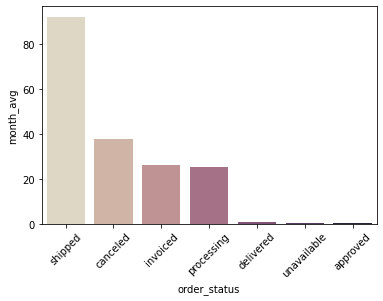

In [22]:
no_delivery_plot = sns.barplot(data = no_delivery, x= 'order_status', y= 'month_avg', palette = 'ch:s=-.2,r=.6')
for item in no_delivery_plot.get_xticklabels():
    item.set_rotation(45)

- Заказы со статусом Shipped только отгрузили со склада и еще не доставлены покупателю. В этом случае никакой аномалии нет
- Заказы со статусом Canceled не доставлены, потому что либо их не оформили, либо они были потеряны при перевозке, либо покупатель не забрал заказ
- За заказы со статусом Invoiced был только выставлен счет, их еще не начинали собирать на складе. В этом случае никакой аномалии нет
- Заказы со статусом Processing не даставлены, потому что и еще не отгрузили со склада. В этом случае никакой аномалии нет
- В трекинге заказов со статусом Delivered произошла ошибка:в датасете нет информации и дате и времени доставки заказа покупателю, но при этом статус говорит о том, что он доставлен
- Заказы со статусом Unavailable не доставлены, т.к. они оказались недоступными
- Заказы со статусом Approved не доставлены, потому что они находятся на ранней стадии обработки


Интернет-магазину следует обратить внимание на достаточно большую часть отмененных заказов

## По каждому товару определить, в какой день недели товар чаще всего покупается

#### Посчитали, сколько раз (не в каком количестве) каждый товар встречается в заказах в разрезе дней недели. Учитывалась именно частота попадания товара в заказ, а не количество, в котором он попал в него

In [23]:
data_purchases['order_purchase_weekday'] = pd.to_datetime(data_purchases.order_purchase_timestamp).dt.day_name()
data_purchases.groupby(['order_purchase_weekday', 'order_id', 'product_id'], as_index = False).agg({'seller_id': 'count'}) \
              .groupby('product_id', as_index = False).agg(agg_func_stats)

,product_id,order_purchase_weekday
,,mode
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32924,fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
32925,fff81cc3158d2725c0655ab9ba0f712c,Monday
32926,fff9553ac224cec9d15d49f5a263411f,Friday


## Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам) 

In [24]:
data_purchases['weeks_in_month'] = round((data_purchases['order_purchase_timestamp'] \
                                       .apply(lambda x: calendar.monthrange(x.year, x.month)[1])) / 7, 2)

In [25]:
data_purchases['order_purchase_month&year'] = data_purchases['order_purchase_timestamp'].apply(lambda x: datetime.strftime(x, format = '%Y-%m'))

In [26]:
avg_purchases_by_week = data_purchases.groupby(['customer_unique_id','order_purchase_month&year', 'weeks_in_month'], as_index = False).agg({'customer_id': 'count'})
avg_purchases_by_week.head(10)

,customer_unique_id,order_purchase_month&year,weeks_in_month,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04,4.29,1
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04,4.29,1
7,00053a61a98854899e70ed204dd4bafe,2018-02,4.00,2
8,0005e1862207bf6ccc02e4228effd9a0,2017-03,4.43,1
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03,4.43,1


In [27]:
avg_purchases_by_week['avg_purchases_by_week'] = round(avg_purchases_by_week['customer_id'] / avg_purchases_by_week['weeks_in_month'], 2)

In [28]:
avg_purchases_by_week[['customer_unique_id', 'order_purchase_month&year', 'avg_purchases_by_week']].head(10)

,customer_unique_id,order_purchase_month&year,avg_purchases_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.23
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04,0.23
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04,0.23
7,00053a61a98854899e70ed204dd4bafe,2018-02,0.50
8,0005e1862207bf6ccc02e4228effd9a0,2017-03,0.23
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03,0.23


## Когортный анализ пользователей

### Готовим данные для когортного анализа
Взяли данные за 2017 год, т.к. 2018 еще не прошел (последние данные - за 3 сентября 2018)

In [29]:
data_purchases.sort_values(by = 'order_purchase_timestamp', ascending = False).head(1).order_purchase_timestamp

75052   2018-09-03 09:06:57
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [30]:
data_for_cohorts = data_purchases.query('order_purchase_year == 2017').reset_index()
data_for_cohorts['date_of_order'] = data_for_cohorts.order_purchase_timestamp
data_for_cohorts.date_of_order = data_for_cohorts.date_of_order.apply(lambda x: datetime.strftime(x, format = '%Y-%m'))
data_for_cohorts.shape

(50846, 26)

In [31]:
data_for_cohorts_med = data_for_cohorts.groupby('customer_unique_id', as_index = False).agg({'date_of_order': 'min'})\
                                       .rename(columns= {'date_of_order': 'join_date'})
data_for_cohorts = data_for_cohorts.merge(data_for_cohorts_med, on = 'customer_unique_id')
data_for_cohorts.shape
#Проверяем количество строк - совпадает с data_for_cohorts до объединения

(50846, 27)

In [32]:
data_for_cohorts = data_for_cohorts.groupby(['join_date', 'date_of_order'], as_index = False)\
                .agg({'customer_unique_id': pd.Series.nunique})\
                .rename(columns = {'customer_unique_id': 'customers_num'})
data_for_cohorts

,join_date,date_of_order,customers_num
0,2017-01,2017-01,753
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
72,2017-10,2017-11,31
73,2017-10,2017-12,11
74,2017-11,2017-11,7217
75,2017-11,2017-12,40


In [33]:
data_for_cohorts['period'] = (pd.to_datetime(data_for_cohorts.date_of_order).dt.to_period('M') - pd.to_datetime(data_for_cohorts.join_date).dt.to_period('M')).apply(attrgetter('n')) 

In [34]:
data_for_cohorts = data_for_cohorts[['join_date', 'period', 'customers_num']]

In [35]:
size_of_cohorts = data_for_cohorts[['join_date', 'customers_num']].groupby('join_date', as_index = False).first()
data_for_cohorts = data_for_cohorts.merge(size_of_cohorts, on = 'join_date') \
                                   .rename(columns = {'customers_num_x': 'customers_num', 'customers_num_y': 'cohort_size'}) 
data_for_cohorts.head(10)

,join_date,period,customers_num,cohort_size
0,2017-01,0,753,753
1,2017-01,1,3,753
2,2017-01,2,2,753
3,2017-01,3,1,753
4,2017-01,4,3,753
5,2017-01,5,1,753
6,2017-01,6,3,753
7,2017-01,7,1,753
8,2017-01,8,1,753
9,2017-01,10,3,753


In [36]:
data_for_cohorts['retention'] = data_for_cohorts.customers_num/data_for_cohorts.cohort_size * 100
data_for_cohorts.head(10)

,join_date,period,customers_num,cohort_size,retention
0,2017-01,0,753,753,100.000000
1,2017-01,1,3,753,0.398406
2,2017-01,2,2,753,0.265604
3,2017-01,3,1,753,0.132802
4,2017-01,4,3,753,0.398406
5,2017-01,5,1,753,0.132802
6,2017-01,6,3,753,0.398406
7,2017-01,7,1,753,0.132802
8,2017-01,8,1,753,0.132802
9,2017-01,10,3,753,0.398406


In [37]:
cohorts_retention = data_for_cohorts[['join_date', 'period', 'retention']] \
                     .pivot(index = 'period', 
                            columns = 'join_date', 
                            values = 'retention')
cohorts_retention

join_date,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
period,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
1,0.398406,0.236267,0.500963,0.598291,0.477662,0.481696,0.520291,0.674861,0.684429,0.702470,0.554247,NaN
2,0.265604,0.295334,0.346821,0.213675,0.477662,0.353243,0.364204,0.337431,0.537766,0.249264,NaN,NaN
3,0.132802,0.118133,0.385356,0.170940,0.393369,0.385356,0.234131,0.265124,0.293327,NaN,NaN,NaN
4,0.398406,0.413467,0.346821,0.341880,0.309076,0.256904,0.286160,0.361533,NaN,NaN,NaN,NaN
5,0.132802,0.118133,0.154143,0.256410,0.337173,0.385356,0.208117,NaN,NaN,NaN,NaN,NaN
6,0.398406,0.236267,0.154143,0.341880,0.421467,0.385356,NaN,NaN,NaN,NaN,NaN,NaN
7,0.132802,0.177200,0.308285,0.299145,0.140489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.132802,0.059067,0.346821,0.299145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Максимальный retention на 3-й месяц (период 2 в cohort_period) наблюдался 2017-09¶

### Визуализируем получившийся результат

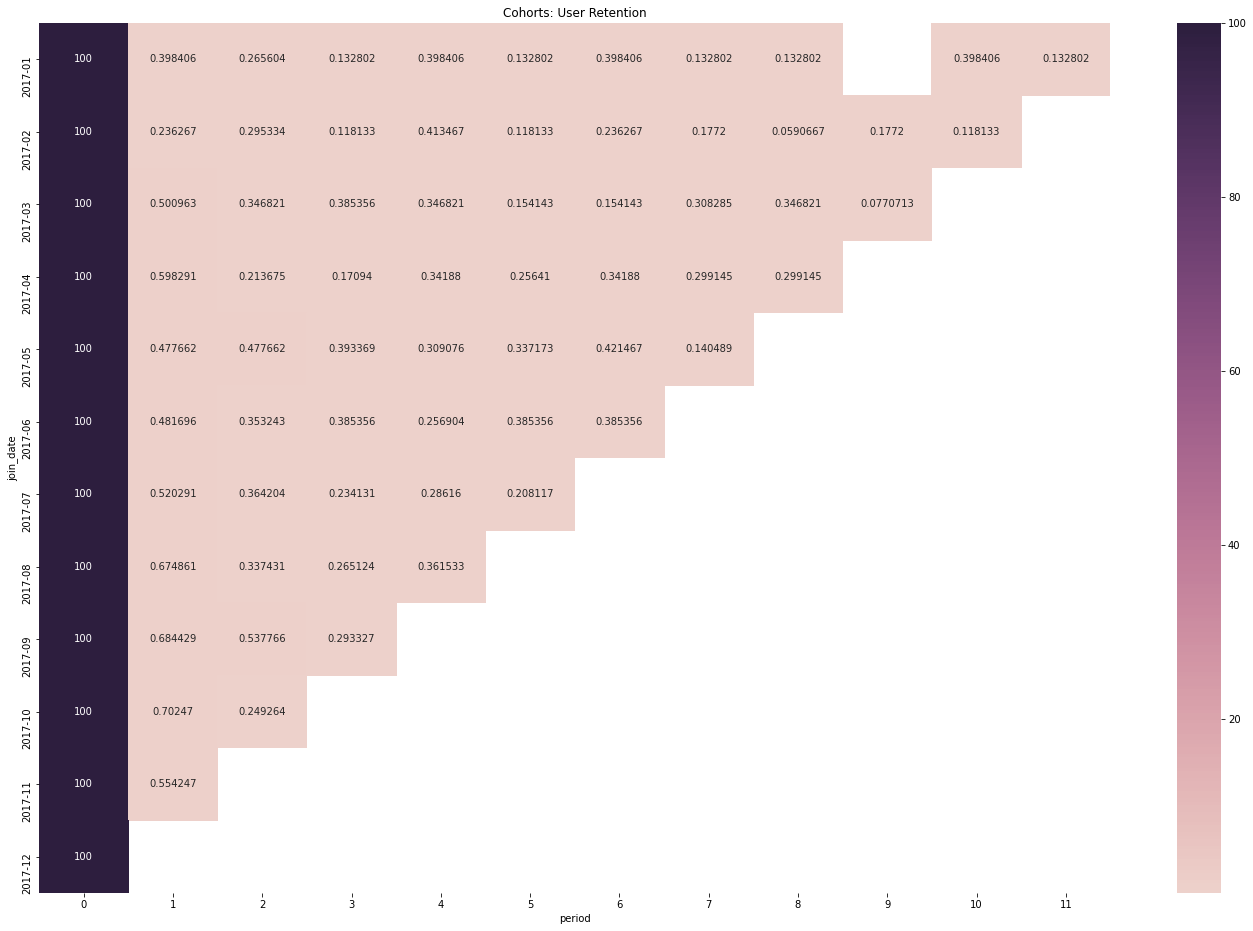

In [38]:
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(cohorts_retention.T, mask= cohorts_retention.T.isnull(), annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

## RFM-сегментация пользователей

#### Найдем самую позднюю дату покупки в данных

In [39]:
data_purchases.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

#### Сегментация будет основана на периоде ровно 365 дней. Найдем начальную дату

In [40]:
data_purchases.order_purchase_timestamp.max() - timedelta(days=365)

Timestamp('2017-09-03 09:06:57')

### Recency

In [41]:
for_rfm_rec = data_purchases.query("order_purchase_timestamp <= '2018-09-03 09:06:57'").query("order_purchase_timestamp >= '2017-09-03 09:06:57'")
for_rfm_rec = for_rfm_rec.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': 'max'}) \
                 .rename(columns = {'order_purchase_timestamp': 'last_purchase_date'})
for_rfm_rec['diff'] = pd.to_datetime('2018-09-03 09:06:57') - for_rfm_rec.last_purchase_date
for_rfm_rec['diff'] = for_rfm_rec['diff'].dt.days
for_rfm_rec = for_rfm_rec.drop(columns = 'last_purchase_date').rename(columns ={'diff': 'Recency'})
for_rfm_rec.head(10)

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f6ccb0745a6a4b88665a16c9f078,325
3,0004aac84e0df4da2b147fca70cf8255,292
4,0004bd2a26a76fe21f786e4fbd80607f,150
5,00050ab1314c0e55a6ca13cf7181fecf,135
6,00053a61a98854899e70ed204dd4bafe,186
7,0005ef4cd20d2893f0d9fbd94d3c0d97,174
8,00082cbe03e478190aadbea78542e933,287
9,00090324bbad0e9342388303bb71ba0a,162


### Frequency

In [42]:
for_rfm_freq = data_purchases.query("order_purchase_timestamp <= '2018-09-03 09:06:57'").query("order_purchase_timestamp >= '2017-09-03 09:06:57'").drop_duplicates(subset = ['customer_id'])
for_rfm_freq = for_rfm_freq.groupby('customer_unique_id', as_index = False).agg({'customer_id': 'count'}) \
                           .rename(columns = {'customer_id': 'Frequency'})
for_rfm_freq.head(10)

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f6ccb0745a6a4b88665a16c9f078,1
3,0004aac84e0df4da2b147fca70cf8255,1
4,0004bd2a26a76fe21f786e4fbd80607f,1
5,00050ab1314c0e55a6ca13cf7181fecf,1
6,00053a61a98854899e70ed204dd4bafe,1
7,0005ef4cd20d2893f0d9fbd94d3c0d97,1
8,00082cbe03e478190aadbea78542e933,1
9,00090324bbad0e9342388303bb71ba0a,1


### Monetary

In [43]:
for_rfm_monet = data_purchases.query("order_purchase_timestamp <= '2018-09-03 09:06:57'").query("order_purchase_timestamp >= '2017-09-03 09:06:57'")
for_rfm_monet = for_rfm_monet.groupby('customer_unique_id', as_index = False).agg({'price': 'sum'}) \
                             .rename(columns = {'price': 'Monetary'})
for_rfm_monet.head(10)

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f6ccb0745a6a4b88665a16c9f078,25.99
3,0004aac84e0df4da2b147fca70cf8255,180.00
4,0004bd2a26a76fe21f786e4fbd80607f,154.00
5,00050ab1314c0e55a6ca13cf7181fecf,27.99
6,00053a61a98854899e70ed204dd4bafe,382.00
7,0005ef4cd20d2893f0d9fbd94d3c0d97,104.90
8,00082cbe03e478190aadbea78542e933,79.00
9,00090324bbad0e9342388303bb71ba0a,49.95


### Объединяем результаты в один датафрейм

In [44]:
rfm = for_rfm_rec.merge(for_rfm_freq, on = 'customer_unique_id').merge(for_rfm_monet, on = 'customer_unique_id')
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
3,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
4,0004bd2a26a76fe21f786e4fbd80607f,150,1,154.00
...,...,...,...,...
73290,fffb09418989a0dbff854a28163e47c6,259,1,58.00
73291,fffbf87b7a1a6fa8b03f081c5f51a201,249,1,149.00
73292,fffcc512b7dfecaffd80f13614af1d16,145,1,688.00
73293,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89


### Считаем квантили для выделения 5 кластеров покупателей

In [45]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 74.0, 0.4: 142.0, 0.6: 207.0, 0.8: 278.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.99, 0.8: 179.8}}

In [46]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [47]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [48]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411
2,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111
3,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,5,115
4,0004bd2a26a76fe21f786e4fbd80607f,150,1,154.00,3,1,4,314
...,...,...,...,...,...,...,...,...
73290,fffb09418989a0dbff854a28163e47c6,259,1,58.00,2,1,2,212
73291,fffbf87b7a1a6fa8b03f081c5f51a201,249,1,149.00,2,1,4,214
73292,fffcc512b7dfecaffd80f13614af1d16,145,1,688.00,3,1,5,315
73293,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,2,1,2,212


#### Т.к. сегментов вышло много, то рассмотрим 11 из них, основываясь на R и F

In [49]:
segment_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segment_map, regex=True)
rfm.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411,promising
2,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111,hibernating
3,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,5,115,hibernating
4,0004bd2a26a76fe21f786e4fbd80607f,150,1,154.00,3,1,4,314,about to sleep
5,00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99,4,1,1,411,promising
6,00053a61a98854899e70ed204dd4bafe,186,1,382.00,3,1,5,315,about to sleep
7,0005ef4cd20d2893f0d9fbd94d3c0d97,174,1,104.90,3,1,3,313,about to sleep
8,00082cbe03e478190aadbea78542e933,287,1,79.00,1,1,3,113,hibernating
9,00090324bbad0e9342388303bb71ba0a,162,1,49.95,3,1,2,312,about to sleep


#### Описание каждого сегмента:
- Champions: покупали недавно, покупают часто и тратят больше всех
- Loyal customers: покупают на регулярной основе, чувствительны к рекламным кампаниям
- Promising: покупали недавно, но много не тратят
- About to sleep: Recency и Frequency ниже среднего; можно потерять их, если не активизировать
- Can't lose them: долго время не покупали, но раньше покупали часто
- Hibernating: последняя покупка была давно, покупок было мало. Могут быть потеряны
- New customers: последняя покупка была недавно, всего покупок немного

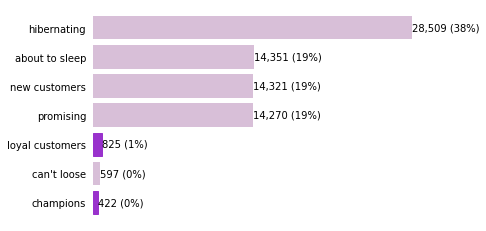

In [50]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='thistle')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('darkorchid')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Магазину стоит пересмотреть свою маркетинговую кампанию, а также политику заказов, поскольку большинство покупателей относится к сегменту Hibernating (38% от общего числа), а лояльных пользователей меньшинство (всего 1% пользователей в сегменте Loyal Customers и совсем незначительное число пользователей из сегмента Champions)